# Point and Local Operators - Exercises
## Computer Vision and Image Processing - Lab Session 4
### Prof: Luigi Di Stefano, luigi.distefano@unibo.it
### Tutor: Pierluigi Zama Ramirez, pierluigi.zama@unibo.it - Riccardo Spezialetti, riccardo.spezialetti@unibo.it

# Point Operator

## Exercise 1: Linear Contrast Stretching
Implement a linear contrast stretching function.

Given $P_{max}$ and $P_{min}$ the maximum and minimum pixel value respectively (can be different from the min and max values of the image), convert each pixel of the original image $P_{in}$ into the new pixel of the output image $P_{out}$ with the following formula:

$P_{out} = \frac{255}{P_{max} - P_{min}}(P_{in} - P_{min})$

Test the function 3 times on the __grayscale__ image "ex/image.png" using as $P_{max}$ and $P_{min}$:

* The minimum and maximum value of the image  respectively. You can use **np.max(array, axis)** and **np.min(array, axis)** to calculate them. 
* $P_{max}=40$ and $P_{min}=0$.
* Choose as $P_{max}$ and $P_{min}$ the values at 95% and 5% percentiles of the distribution respectively (the value of the 5% pixels ordered from the lowest value pixel). 

Plot the histogram of the image before and after each transformation.

In [10]:
# Write your solution here
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("ex/image.png", cv2.IMREAD_GRAYSCALE)
img = np.float32(img)

def linear_stretch(img, pmax, pmin):
    new_img = (img.copy() - pmin) * 255 / (pmax-pmin) 
    new_img = np.minimum(new_img, 255)
    new_img = np.maximum(new_img, 0)
    return new_img

def img_hist(img):
    return np.histogram(img, 256, (0,256))[0]

def plot_img_hist(img):
    plt.figure(figsize=(15,3))
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    plt.subplot(1,2,2)
    histogram = img_hist(img)
    plt.axis('off')
    plt.stem(list(range(len(histogram))), histogram)
    plt.show()


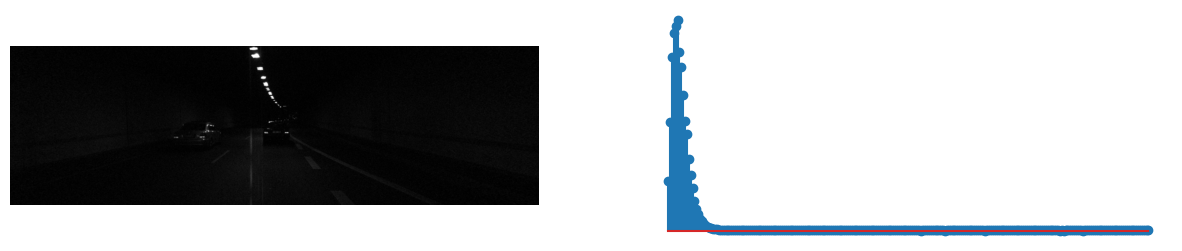

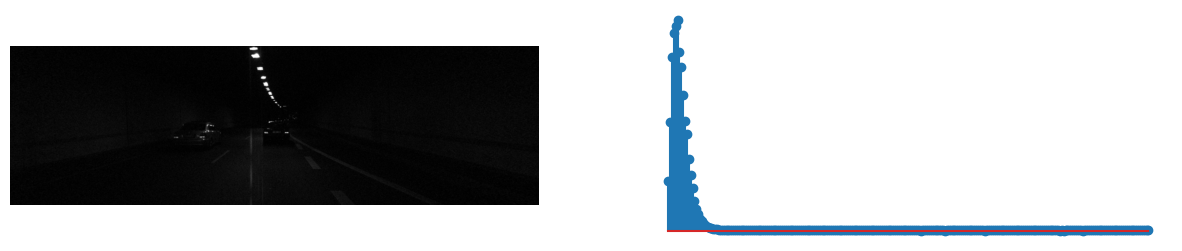

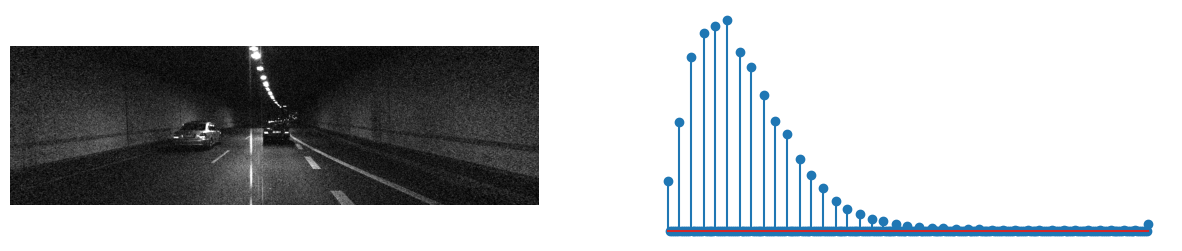

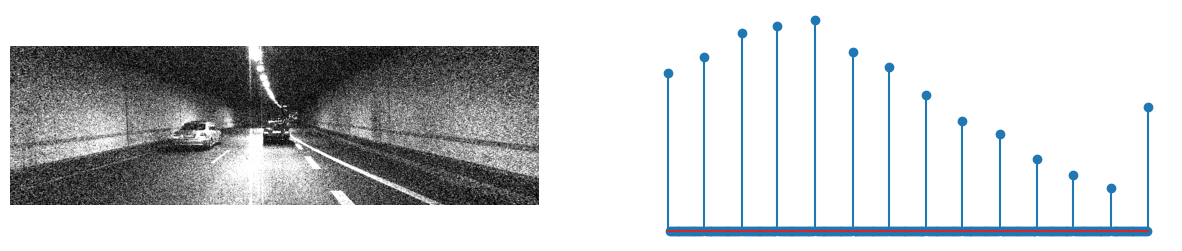

In [11]:
plot_img_hist(img)

transformed_1 = linear_stretch(img, np.max(img.flatten()), np.min(img.flatten()))
plot_img_hist(transformed_1)

transformed_2 = linear_stretch(img, 40, 0)
plot_img_hist(transformed_2)

transformed_3 = linear_stretch(img, np.percentile(img.flatten(), 95), np.percentile(img.flatten(), 5))
plot_img_hist(transformed_3)


## Exercise 2: Exponential Operator
Implement an exponential operator.
Given an exponent $r$ compute for each input pixel $P_{in}$ the output pixel value $P_{out}$ with the following exponential operator formula:

$P_{out}=255*(\frac{P_{in}}{255})^r$

Test the function on the __grayscale__ image "ex/image.png" using as $r=0.45$.

Plot the histogram of the image before and after the transformation.

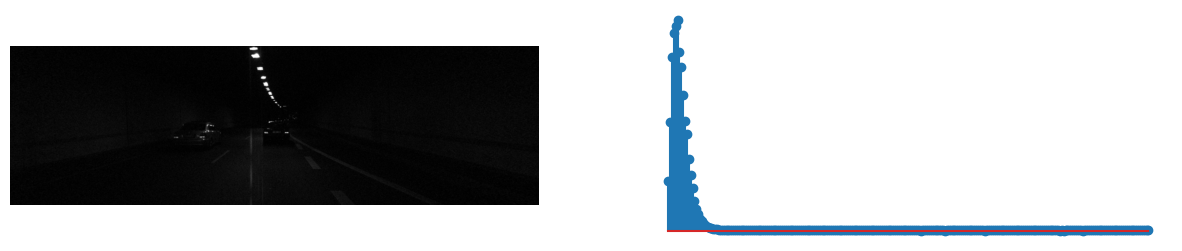

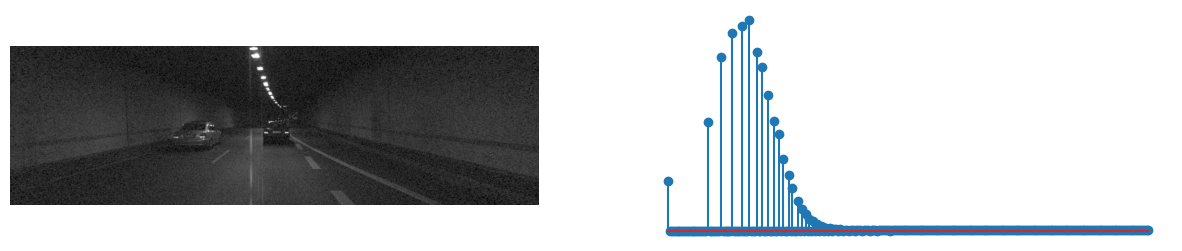

In [12]:
# Write your solution here
def gamma_operator(img, r):
    return 255*(img / 255)**r

plot_img_hist(img)

transformed_1 = gamma_operator(img.copy(), 0.45)
plot_img_hist(transformed_1)

## Exercise 3: Histogram Equalization
Implement an histogram equalization operator.

Given intesity of pixel $i \in [0 .. 255]$, the image histogram $h$, the total number of pixels of the image $N$, compute the cumulative distribution function:

$PMF(i) = \frac{1}{N}\sum_{k=0}^i(h(k))$

and then use it to perform the equalization:

$P_{out} = 255PMF(P_{in})$

Equalization spreads uniformly pixel intensities across the whole available range, which usually improves the contrast.

Test the function on the __grayscale__ image "ex/image.png".

Plot the histogram of the image before and after the transformation.

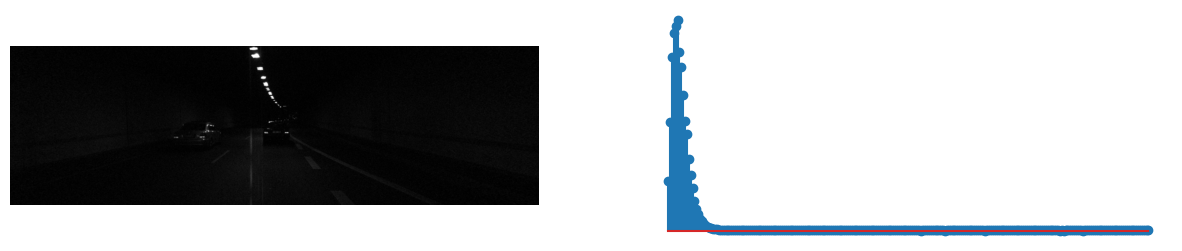

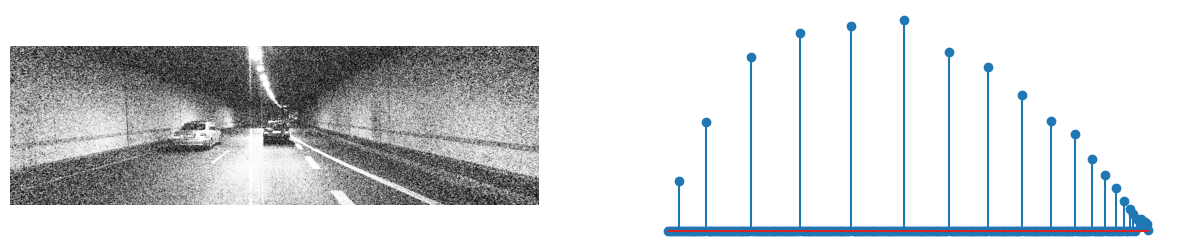

In [22]:
# Write your solution here

def pmf_img(img):
    img = np.int32(img)
    histogram = img_hist(img)

    cumulative_values = histogram.copy()
    for i in range(1,len(cumulative_values)):
        cumulative_values[i] += cumulative_values[i-1]


    new_img = np.zeros_like(img, dtype=np.float32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_img[i,j] = cumulative_values[img[i, j]]

    new_img = new_img / (new_img.shape[0] * new_img.shape[1] / 255.)

    return new_img


plot_img_hist(img)
new_img = pmf_img(img)
plot_img_hist(new_img)

# Local Operator

## Exercise 4: Mean Filter
Apply a mean filter of kernel size 9x9 to an image.

Test it on the __grayscale__ image "ex/landscape.jpg".

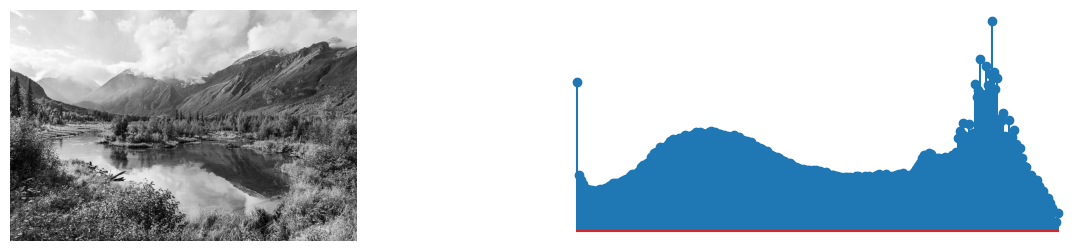

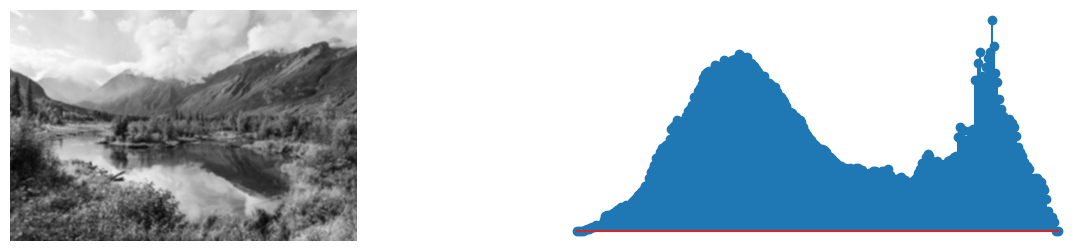

In [5]:
# Write your solution here
img = cv2.imread("ex/landscape.jpg", cv2.IMREAD_GRAYSCALE)

new_img = cv2.filter2D(src=img, 
                    ddepth=-1, 
                    kernel=np.ones((9,9))/(9*9), 
                    anchor=(-1, -1))

plot_img_hist(img)
plot_img_hist(new_img)

## Exercise 5: Other Filters
Apply a denoising filter and an high-pass filter (edge-enhancement) to an image.

* Denoising filter = $\begin{bmatrix} 
                        1 & 2 & 1\\
                        2 & 4 & 2\\
                        1 & 2 & 1\\
                        \end{bmatrix}\frac{1}{16} $

* High pass filter (edge-enhancement) = $\begin{bmatrix} 
                        0 & 1 & 0\\
                        1 & -4 & 1\\
                        0 & 1 & 0\\
                        \end{bmatrix}$

Test it on the __grayscale__ image "ex/landscape.jpg".

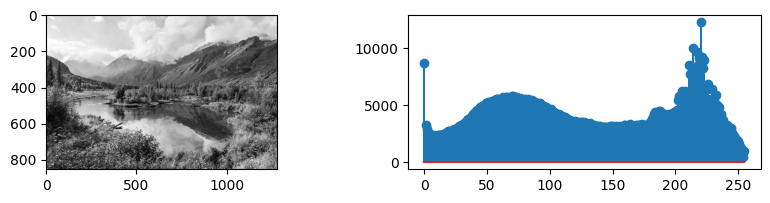

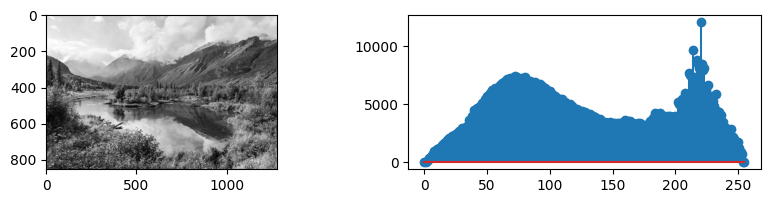

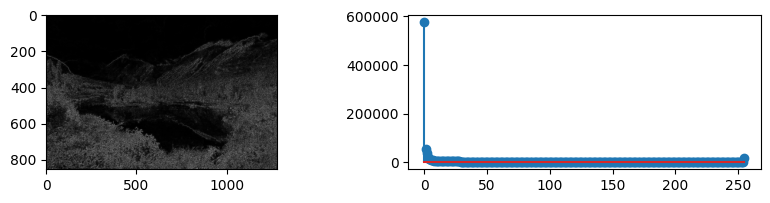

In [97]:
# Write your solution here

denoised_img = cv2.filter2D(src=img,
                            ddepth=-1,
                            kernel=np.array([[1,2,1],[2,4,2],[1,2,1]])/(16),
                            anchor=(-1,-1))


edge_enhanced_img = cv2.filter2D(src=img,
                            ddepth=-1,
                            kernel=np.array([[0,1,0],[1,-4,1],[0,1,0]]),
                            anchor=(-1,-1))


plot_img_hist(img)
plot_img_hist(denoised_img)
plot_img_hist(edge_enhanced_img)

## Exercise 6: Gaussian Filter

Apply a gaussian filter with $\sigma=1.5$ to an image.

Do it twice:
* Finding the gaussian kernel and applying it.  
* Using the OpenCV function for gaussian blurring.

Find the kernel size following the rule of thumb showed in the theory slides.

Test it on the __grayscale__ image "ex/landscape.jpg".

In [98]:
# Write your solution here
sigma = 1.5
k = np.ceil(3*sigma)
gauss_kernel_dim = 2*k+1

gk = cv2.getGaussianKernel(gauss_kernel_dim, sigma)
gk_2d = gk @ gk.T

new_img = cv2.filter2D(img, -1, gk_2d, (-1,-1))

new_img2 = cv2.GaussianBlur(img, (gauss_kernel_dim, gauss_kernel_dim), sigma)

## Exercise 7: Bilateral Filter
Apply a bilateral filter with filter size of 9x9 and both sigma values of 75. 

Test it on the __grayscale__ image "ex/landscape.jpg".

__N.B__:
* Sigma values: If they are small (< 10), the filter will not have much effect, whereas if they are large (> 150), they will have a very strong effect, making the image look “cartoonish”.
* Filter size: Large filters (> 5) are very slow, so it is recommended to use d=5 for real-time applications, and approximately 9 for offline applications that need heavy noise filtering.

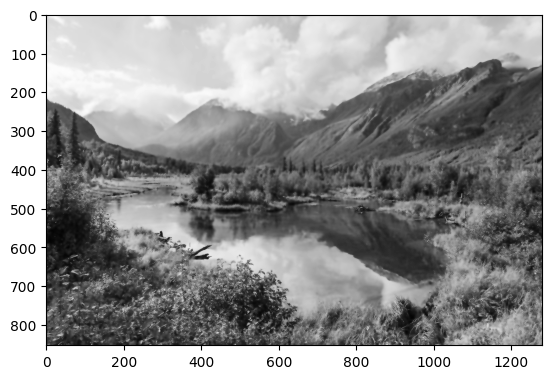

In [99]:
# Write your solution here
new_img = cv2.bilateralFilter(img, 9, 75, 75)

plt.imshow(new_img, cmap="gray", vmin=0, vmax=256)


## Exercise 8: Sobel Filter
Apply the Sobel kernels to calculate the smooth derivates $\frac{dI(x, y)}{dx}$, $\frac{dI(x, y)}{dy}$ along x and y respectively. Visualize the absolute value of the two results.

Then, calculate the module of the gradient as $max(abs(\frac{dI(x, y)}{dx}), abs(\frac{dI(x, y)}{dy}))$ and visualize also this last result.

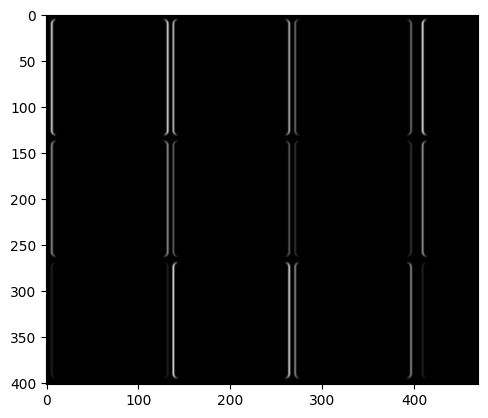

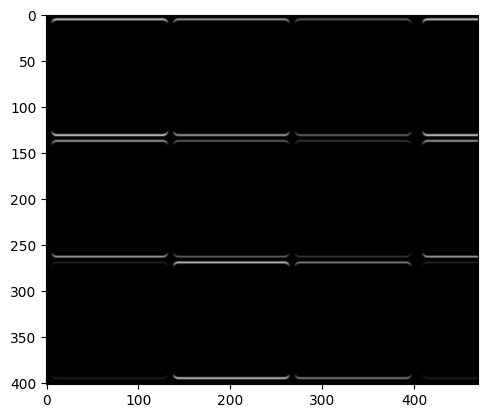

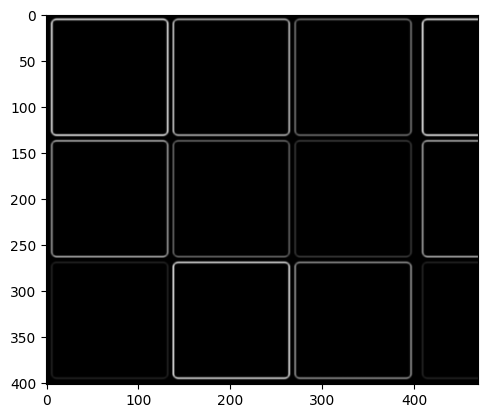

In [107]:
# Write your solution here

img = cv2.imread("ex/squares.png",cv2.IMREAD_GRAYSCALE)

sobel_ker = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])/4

dIdx = cv2.filter2D(np.float32(img), -1, sobel_ker, (-1,-1))
dIdy = cv2.filter2D(np.float32(img), -1, sobel_ker.T, (-1,-1))

dIdx_module = np.abs(dIdx)
dIdy_module = np.abs(dIdy)

I_module = np.maximum(dIdx_module, dIdy_module)

plt.imshow(dIdx_module, cmap="gray", vmin=0, vmax=256)
plt.show()
plt.imshow(dIdy_module, cmap="gray", vmin=0, vmax=256)
plt.show()
plt.imshow(I_module, cmap="gray", vmin=0, vmax=256)
plt.show()
